In [405]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [406]:
import pandas as pd
toggl_tasks_data = pd.read_csv('toggl_tasks.csv', index_col=['started_at'], parse_dates=['started_at'])
toggl_tasks_data = toggl_tasks_data.loc[:, ~toggl_tasks_data.columns.str.contains('^Unnamed')] 
toggl_tasks_data = toggl_tasks_data.loc[:, ~toggl_tasks_data.columns.str.contains('expected_duration')] 

import datetime
tdate_list = []
for tstr in toggl_tasks_data['ended_at']:
        tdatetime = datetime.datetime.strptime(tstr, '%Y-%m-%dT%H:%M:%S+09:00')
        tdate = datetime.date(tdatetime.year, tdatetime.month, tdatetime.day)
        tdate_list.append(tdate)
toggl_tasks_data['date'] = tdate_list

In [407]:
toggl_tasks_data.head()

,description,project,duration,ended_at,project_hex_color,date
started_at,,,,,,
2019-05-27 17:24:53+09:00,120min/GCIの課題やる,エンジニアリング,511,2019-05-27T17:33:24+09:00,#3750b5,2019-05-27
2019-05-27 15:19:08+09:00,120min/GCIの課題やる,エンジニアリング,6079,2019-05-27T17:00:27+09:00,#3750b5,2019-05-27
2019-05-27 10:40:03+09:00,120min/GCIの課題やる,エンジニアリング,5794,2019-05-27T12:16:37+09:00,#3750b5,2019-05-27
2019-05-26 22:21:43+09:00,180min/CSの論文読む,大学課題,12541,2019-05-27T01:50:44+09:00,#06aaf5,2019-05-27
2019-05-26 19:48:45+09:00,30min/matesをcircleciで自動デプロイできるようにする,エンジニアリング,7214,2019-05-26T21:48:59+09:00,#3750b5,2019-05-26


In [408]:
toggl_tasks_data.description



started_at
2019-05-27 17:24:53+09:00                            120min/GCIの課題やる
2019-05-27 15:19:08+09:00                            120min/GCIの課題やる
2019-05-27 10:40:03+09:00                            120min/GCIの課題やる
2019-05-26 22:21:43+09:00                             180min/CSの論文読む
2019-05-26 19:48:45+09:00        30min/matesをcircleciで自動デプロイできるようにする
2019-05-26 19:15:01+09:00        30min/matesをcircleciで自動デプロイできるようにする
2019-05-26 18:51:19+09:00                  30min/matesのパフォーマンスチューニング
2019-05-26 18:43:02+09:00                      10min/matesのメールアドレス変更
2019-05-26 18:30:56+09:00                             180min/CSの論文読む
2019-05-26 18:20:42+09:00                                      ゲームする
2019-05-26 17:35:31+09:00                          40min/TOEFLスピーキング
2019-05-26 16:48:21+09:00                          40min/TOEFLスピーキング
2019-05-26 16:21:21+09:00                   30min/AtCoderの勉強法について調べる
2019-05-26 15:36:45+09:00                           Togglのラベルづけをやり直す
2019-05-26 15:06:39+09:

In [409]:
toggl_tasks_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1298 entries, 2019-05-27 17:24:53+09:00 to 2019-02-25 20:22:20+09:00
Data columns (total 6 columns):
description          1298 non-null object
project              935 non-null object
duration             1298 non-null int64
ended_at             1298 non-null object
project_hex_color    935 non-null object
date                 1298 non-null object
dtypes: int64(1), object(5)
memory usage: 111.0+ KB


In [410]:
project_mean_list = toggl_tasks_data.groupby('project')['duration'].mean()
project_mean_list

project
その他           1049.131944
その他インプット      1392.761194
インターン         1428.130000
エンジニアリング      2393.271605
コミュニティ運営      2653.142857
デザイン          2687.200000
デザイン系インプット     850.500000
休憩             468.528384
大学課題          2492.677686
技術的アウトプット     1270.000000
振り返り          1308.466667
目標/計画          928.200000
筋トレ            298.000000
院留学           1822.992754
Name: duration, dtype: float64

## 院留学にかけた時間の推移

In [411]:
d = toggl_tasks_data[toggl_tasks_data['project'] == '院留学']
color_code = d[0:1]['project_hex_color']

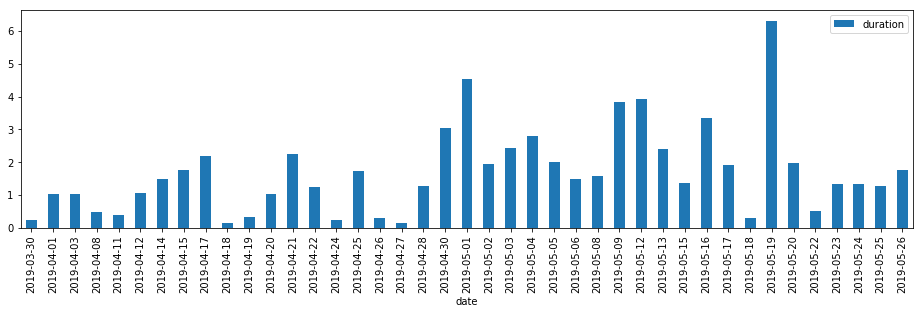

In [412]:
english_time_sum_list = toggl_tasks_data[toggl_tasks_data['project'] == '院留学'].groupby(['date']).sum()/3600
english_time_sum_list.plot(kind='bar',figsize=(16,4))

<BarContainer object of 41 artists>

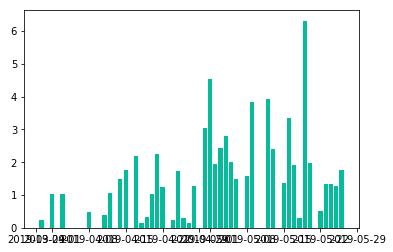

In [413]:
date = english_time_sum_list.index
duration = english_time_sum_list['duration']
plt.bar(date, duration, color=color_code)

In [414]:
english_time_sum_list['duration'].describe()

count    41.000000
mean      1.704424
std       1.311138
min       0.146389
25%       1.019444
50%       1.483889
75%       2.188611
max       6.315556
Name: duration, dtype: float64

## 工数見積もり精度の推移分析
いくつかの加工が必要なので次の手順で分析した。

まず日付とその日のタスクでかかった時間を集計する
（例えば120min/~課題でタイマーをスタートしても、途中でタイマーを切って再開みたいな状況の時に、愚直に各カラムにexpected durを代入するとexpected durが大きくなってしまうため、先に日付ごとに各タスクを分割した。）

In [415]:
project_mean_list = toggl_tasks_data.groupby(['date', 'description'], as_index=False).sum()
project_mean_list

,date,description,duration
0,2019-02-25,LGTMの広報のタスクを進める,1202
1,2019-02-25,Pomodoro Break,383
2,2019-02-25,matesの記事を書くための前準備,1200
3,2019-02-25,今やれることの洗い出しと細分化,808
4,2019-02-25,今後何するか決める,1200
5,2019-02-25,何をやるかの決定,866
6,2019-02-25,自身のHPの仕様決め,1200
7,2019-02-26,KERNEL面接を経て,1200
8,2019-02-26,LGTM広報タスクを進める,1200
9,2019-02-26,Pomodoro Break,1356


日付ごとにタスクを集計した後、各タスクの見積もり時間をデータとしてdescriptionから抽出する

In [416]:
import re
pattern = '(\d*)min\/'
expected_dur_list = []
for tasks in project_mean_list['description']:
    expected_dur_match = re.match(pattern, tasks)
    expected_dur = int(expected_dur_match[1])*60 if expected_dur_match else None
    expected_dur_list.append(expected_dur)

project_mean_list['expected duration'] =  expected_dur_list

そして以下のようにカラムを追加
- ratio: 実際かかった時間/見積もった時間でそのズレを代入
- diff: 実際かかった時間 - 見積もった時間
- abs diff: diffの絶対値
いずれも小さい程よい。
ratioが小さいということは見積もりよりも早く終えたということ
diffが小さいということは見積もりと実際かかった時間のズレが小さかったということ

In [417]:
dur_expected_dur_list = project_mean_list.dropna(subset=['expected duration'])
dur_expected_dur_list['ratio'] = dur_expected_dur_list['duration'] / dur_expected_dur_list['expected duration']
dur_expected_dur_list['diff'] = dur_expected_dur_list['duration'] - dur_expected_dur_list['expected duration']
dur_expected_dur_list['abs diff'] = abs(dur_expected_dur_list['duration'] - dur_expected_dur_list['expected duration'])
dur_expected_dur_list

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,date,description,duration,expected duration,ratio,diff,abs diff
180,2019-04-05,10min/全ての授業をITCLMSに登録する,649,600.0,1.081667,49.0,49.0
181,2019-04-05,150min/ネットワークはなぜつながるか残り300ページ,3014,9000.0,0.334889,-5986.0,5986.0
182,2019-04-05,15min/matesのエラーページ実装前処理,1107,900.0,1.230000,207.0,207.0
183,2019-04-06,150min/ネットワークはなぜつながるか残り300ページ,1300,9000.0,0.144444,-7700.0,7700.0
184,2019-04-06,30min/計画と目標の評価をきちんとするための施策を打つ。,2027,1800.0,1.126111,227.0,227.0
187,2019-04-07,15min/GCIに応募する,277,900.0,0.307778,-623.0,623.0
188,2019-04-07,15min/Toggl集計結果分析,1374,900.0,1.526667,474.0,474.0
189,2019-04-07,15min/自分について考える期間のまとめを言語化する,1583,900.0,1.758889,683.0,683.0
190,2019-04-07,180min/本: ネットワークはなぜつながるのか,17089,10800.0,1.582315,6289.0,6289.0
191,2019-04-07,30min/要約: FACTFULNESS,1075,1800.0,0.597222,-725.0,725.0


## dateとratioの推移をグラフ化

ratioの推移をタスクごとに見る（横軸は時系列）

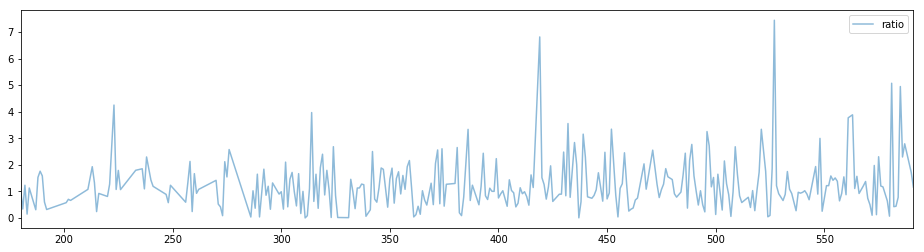

In [418]:
dur_expected_dur_list.drop(["duration", "expected duration", "description", "diff", "abs diff"], axis=1).plot(figsize=(16,4), alpha=0.5)

各日のratioの平均の推移を見る

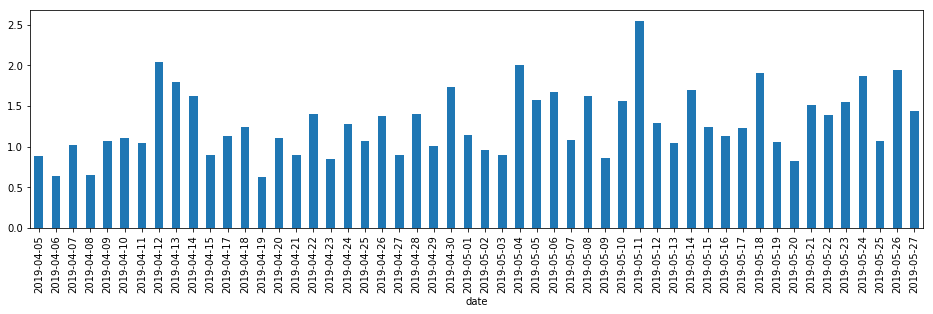

In [419]:
date_ratio_mean_list = dur_expected_dur_list.groupby("date")["ratio"].mean()
date_ratio_mean_list.plot(kind='bar',figsize=(16,4))

各タスクの見積もりのズレの絶対値の推移を見る

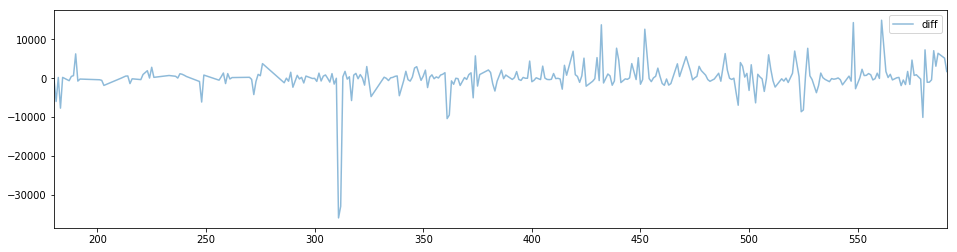

In [420]:
dur_expected_dur_list.drop(["duration", "expected duration", "description", "ratio", "abs diff"], axis=1).plot(figsize=(16,4), alpha=0.5)

日付とズレの推移を見る

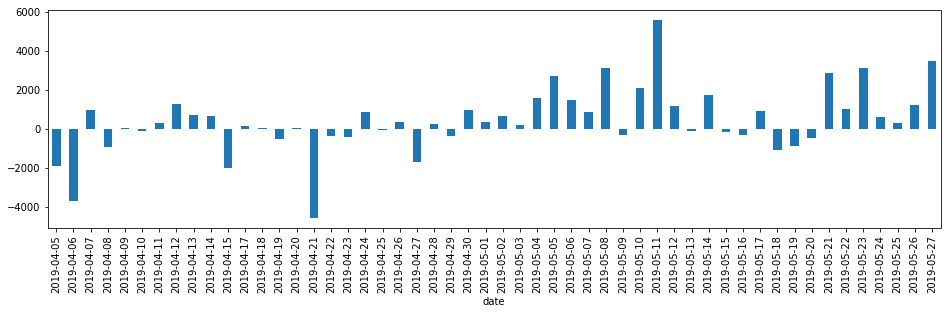

In [421]:
date_diff_mean_list = dur_expected_dur_list.drop(["duration", "expected duration", "description", "ratio", "abs diff"], axis=1).groupby("date")["diff"].mean()
date_diff_mean_list.plot(kind='bar',figsize=(16,4))

最後にそれぞれの値同士の相関分析をする。
ヒートマップは赤白いほど正相関が強く、青白いほど負の相関が強く、黒いほど相関が少ない。

,duration,expected duration,ratio,diff
duration,1.000000,0.376406,0.519694,0.520123
expected duration,0.376406,1.000000,-0.172873,-0.595499
ratio,0.519694,-0.172873,1.000000,0.610012
diff,0.520123,-0.595499,0.610012,1.000000


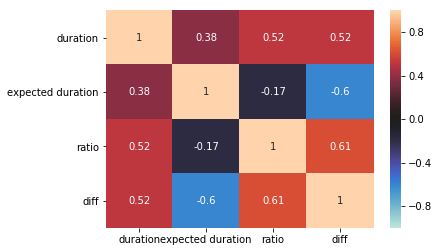

In [422]:
import seaborn as sns
df_corr = dur_expected_dur_list.drop(["abs diff"], axis=1).corr()
sns.heatmap(df_corr, vmax=1, vmin=-1, center=0, annot=True)
df_corr

,date,ratio,diff,abs diff
180,2019-04-05,1.081667,49.0,49.0
181,2019-04-05,0.334889,-5986.0,5986.0
182,2019-04-05,1.230000,207.0,207.0
183,2019-04-06,0.144444,-7700.0,7700.0
184,2019-04-06,1.126111,227.0,227.0
187,2019-04-07,0.307778,-623.0,623.0
188,2019-04-07,1.526667,474.0,474.0
189,2019-04-07,1.758889,683.0,683.0
190,2019-04-07,1.582315,6289.0,6289.0
191,2019-04-07,0.597222,-725.0,725.0


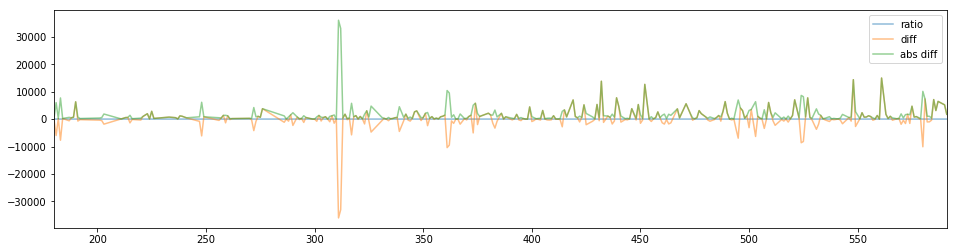

In [423]:
dur_expected_dur_list2 = dur_expected_dur_list.drop(["duration", "expected duration", "description"], axis=1)
dur_expected_dur_list2.plot(figsize=(16,4), alpha=0.5)
dur_expected_dur_list2

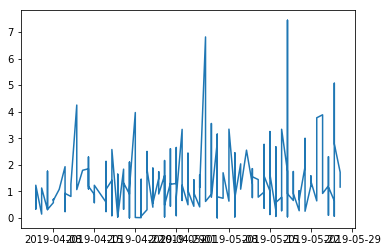

In [424]:
x = dur_expected_dur_list2['date']
y = dur_expected_dur_list2['ratio']
plt.plot(x, y)

## 一定期間ごとの作業時間の推移
- 1日ごと
- 曜日ごと
- 1週間ごと
- 2週間ごと
- 1ヶ月ごと

In [435]:
df = toggl_tasks_data
df_w = df.set_index([df.index.weekday, df.index])
df_w.index.names = ['weekday', 'date']
df_w

description  \
weekday date                                                                 
0       2019-05-27 17:24:53+09:00                          120min/GCIの課題やる   
        2019-05-27 15:19:08+09:00                          120min/GCIの課題やる   
        2019-05-27 10:40:03+09:00                          120min/GCIの課題やる   
6       2019-05-26 22:21:43+09:00                           180min/CSの論文読む   
        2019-05-26 19:48:45+09:00      30min/matesをcircleciで自動デプロイできるようにする   
        2019-05-26 19:15:01+09:00      30min/matesをcircleciで自動デプロイできるようにする   
        2019-05-26 18:51:19+09:00                30min/matesのパフォーマンスチューニング   
        2019-05-26 18:43:02+09:00                    10min/matesのメールアドレス変更   
        2019-05-26 18:30:56+09:00                           180min/CSの論文読む   
        2019-05-26 18:20:42+09:00                                    ゲームする   
        2019-05-26 17:35:31+09:00                        40min/TOEFLスピーキング   
        2019-05-26 16:48:21+09:00                        40min/TOEFLスピーキング   
        2019-05-26 16:21:21+09:00                 30min/AtCoderの勉強法について調べる   
        2019-05-26 15:36:45+09:00                         Togglのラベルづけをやり直す   
        2019-05-26 15:06:39+09:00                      30min/AtCoderのABCやる   
        2019-05-26 15:05:24+09:00                                    ゲームする   
        2019-05-26 14:00:14+09:00                      30min/AtCoderのABCやる   
        2019-05-26 11:29:59+09:00                      30min/AtCoderのABCやる   
        2019-05-26 10:40:19+09:00                                    ゲームする   
        2019-05-26 07:52:53+09:00                         60min/AtCoderの復習   
        2019-05-26 07:39:38+09:00                                    ゲームする   
        2019-05-26 07:26:25+09:00                      30min/TOEFLスピーキングやる   
5       2019-05-25 22:46:56+09:00  60min/mates、infinite scrollにアニメーションをつける   
        2019-05-25 21:00:57+09:00                       90min/AtCoderに参加する   
        2019-05-25 20:25:54+09:00                   60min/mates、Slack認証つける   
        2019-05-25 20:22:51+09:00                          30min/AtCoderやる   
        2019-05-25 16:32:24+09:00                   60min/mates、Slack認証つける   
        2019-05-25 16:08:51+09:00                 10min/Slack API Tokenの取得   
        2019-05-25 15:55:38+09:00                                    ゲームする   
        2019-05-25 15:30:01+09:00                           120min/AtCoder   
...                                                                    ...   
1       2019-02-26 18:04:30+09:00                       matesを作りましたという話を書く   
        2019-02-26 18:01:21+09:00                           Pomodoro Break   
        2019-02-26 17:41:21+09:00                              KERNEL面接を経て   
        2019-02-26 14:50:29+09:00                           Pomodoro Break   
        2019-02-26 14:30:29+09:00                                    break   
        2019-02-26 14:30:16+09:00                           自分のHPで使うFWを決める   
        2019-02-26 14:27:12+09:00                           Pomodoro Break   
        2019-02-26 14:07:12+09:00                           自分のHPで使うFWを決める   
        2019-02-26 10:11:15+09:00                           Pomodoro Break   
        2019-02-26 10:11:08+09:00                         キャッチコピーの候補を10個作る   
        2019-02-26 10:11:05+09:00                           Pomodoro Break   
        2019-02-26 09:51:05+09:00                         キャッチコピーの候補を10個作る   
        2019-02-26 09:47:34+09:00                           Pomodoro Break   
        2019-02-26 09:27:34+09:00                            LGTM広報タスクを進める   
        2019-02-26 01:39:22+09:00                          団体のスローガンの案出しをする   
        2019-02-26 01:39:09+09:00                           Pomodoro Break   
        2019-02-26 01:19:09+09:00                          団体のスローガンの案出しをする   
        2019-02-26 01:17:25+09:00                           Pomodoro Break   
        2019-02-26 00:57:25+09:00                                 タスク一覧の更新   
0      

In [436]:
toggl_tasks_data

,description,project,duration,ended_at,project_hex_color,date
started_at,,,,,,
2019-05-27 17:24:53+09:00,120min/GCIの課題やる,エンジニアリング,511,2019-05-27T17:33:24+09:00,#3750b5,2019-05-27
2019-05-27 15:19:08+09:00,120min/GCIの課題やる,エンジニアリング,6079,2019-05-27T17:00:27+09:00,#3750b5,2019-05-27
2019-05-27 10:40:03+09:00,120min/GCIの課題やる,エンジニアリング,5794,2019-05-27T12:16:37+09:00,#3750b5,2019-05-27
2019-05-26 22:21:43+09:00,180min/CSの論文読む,大学課題,12541,2019-05-27T01:50:44+09:00,#06aaf5,2019-05-27
2019-05-26 19:48:45+09:00,30min/matesをcircleciで自動デプロイできるようにする,エンジニアリング,7214,2019-05-26T21:48:59+09:00,#3750b5,2019-05-26
2019-05-26 19:15:01+09:00,30min/matesをcircleciで自動デプロイできるようにする,エンジニアリング,1689,2019-05-26T19:43:10+09:00,#3750b5,2019-05-26
2019-05-26 18:51:19+09:00,30min/matesのパフォーマンスチューニング,エンジニアリング,1396,2019-05-26T19:14:35+09:00,#3750b5,2019-05-26
2019-05-26 18:43:02+09:00,10min/matesのメールアドレス変更,エンジニアリング,385,2019-05-26T18:49:27+09:00,#3750b5,2019-05-26
2019-05-26 18:30:56+09:00,180min/CSの論文読む,大学課題,713,2019-05-26T18:42:49+09:00,#06aaf5,2019-05-26


In [437]:
dd = toggl_tasks_data.resample('d').sum()
dd

,duration
started_at,
2019-02-25 00:00:00+09:00,6859
2019-02-26 00:00:00+09:00,20066
2019-02-27 00:00:00+09:00,6272
2019-02-28 00:00:00+09:00,7380
2019-03-01 00:00:00+09:00,15970
2019-03-02 00:00:00+09:00,0
2019-03-03 00:00:00+09:00,15880
2019-03-04 00:00:00+09:00,89
2019-03-05 00:00:00+09:00,0


In [438]:
dw = toggl_tasks_data.resample('W').sum()
dw

,duration
started_at,
2019-03-03 00:00:00+09:00,72427
2019-03-10 00:00:00+09:00,20387
2019-03-17 00:00:00+09:00,38286
2019-03-24 00:00:00+09:00,100415
2019-03-31 00:00:00+09:00,84090
2019-04-07 00:00:00+09:00,135221
2019-04-14 00:00:00+09:00,100908
2019-04-21 00:00:00+09:00,117121
2019-04-28 00:00:00+09:00,130424


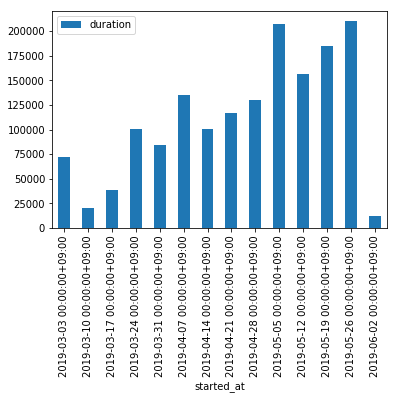

In [439]:
dw.plot(kind='bar')

In [440]:
dw2 = toggl_tasks_data.resample('2W').sum()
dw2

,duration
started_at,
2019-03-03 00:00:00+09:00,72427
2019-03-17 00:00:00+09:00,58673
2019-03-31 00:00:00+09:00,184505
2019-04-14 00:00:00+09:00,236129
2019-04-28 00:00:00+09:00,247545
2019-05-12 00:00:00+09:00,363406
2019-05-26 00:00:00+09:00,395589
2019-06-09 00:00:00+09:00,12384


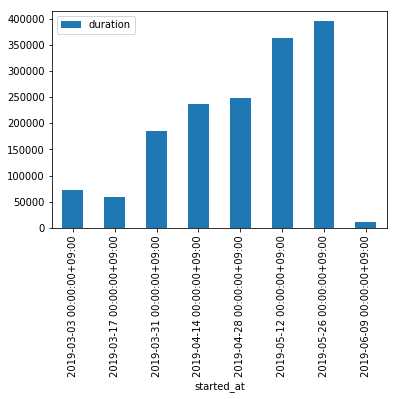

In [441]:
dw2.plot(kind='bar')

In [442]:
dm = toggl_tasks_data.resample('M').sum() 
dm

,duration
started_at,
2019-02-28 00:00:00+09:00,40577
2019-03-31 00:00:00+09:00,275028
2019-04-30 00:00:00+09:00,519456
2019-05-31 00:00:00+09:00,735597


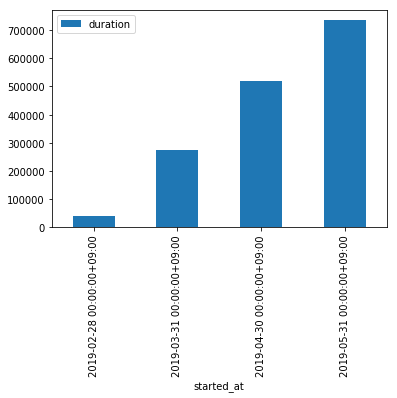

In [443]:
dm.plot(kind='bar')

<BarContainer object of 1298 artists>

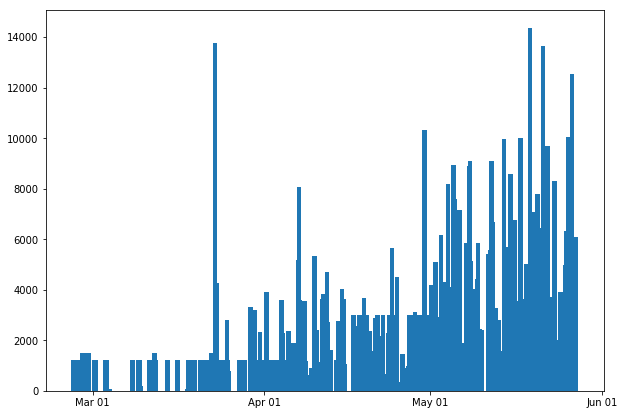

In [444]:
fig, ax = plt.subplots(figsize=(10,7))
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.bar(df.index, df['duration'])